# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:\\Users\\VBACOMishrR\\OneDrive - Department of Veterans Affairs\\Documents\\DataScienceGuidedCapstone\\insurance2.csv')

In [9]:
medical.shape
medical.head()
pop_heights = medical['bmi']


In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__The standard deviation is almost as large as the mean

This indicates very high variability in charges

Individual values are spread widely around the mean

Extremely small sample size (n = 5)

Estimates are unstable

One observation can dominate results

Charges are strongly right-skewed

One or two large values (≈ 22,000) pull the mean upward

Mean is not representative of a “typical” individual

Standard deviation assumes symmetry

SD works best for roughly symmetric distributions

Medical charges are usually non-normal and skewed

Mean of charges:  13270.422265141257
Standard deviation of charges:  12105.484975561612


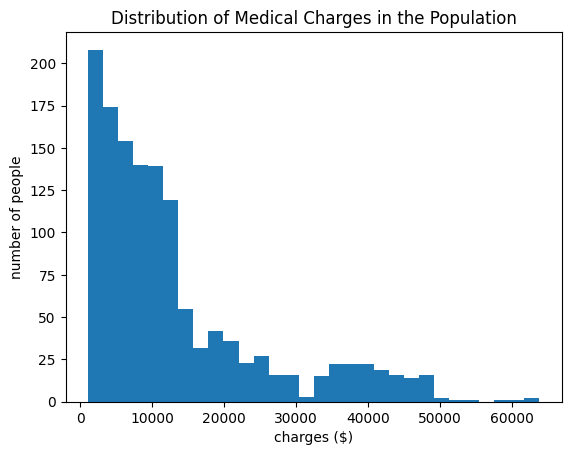

In [11]:
#calculate mean and standard deviation of the charges column
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=0)
print("Mean of charges: ", mean_charges)
print("Standard deviation of charges: ", std_charges)

#plot histogram of charges column
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Medical Charges in the Population')
# --- IGNORE ---

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__These data allow inference if they are a random independent sample from the population of charges. Under that assumption, we can estimate the population mean and quantify uncertainty using the sampling distribution of the mean. Since the population standard deviation is unknown and the sample size is small, the most appropriate frequentist test is a one-sample, one-sided t-test comparing the sample mean to $12,000.

Since administrator fears mean has fallen below 12,000: The most appropriate frequentist test would be to test would be One-Sample t-Test

Null Hypothesis
𝐻0 : 𝜇 = 12000

Alternative Hypothesis (one-sided)
𝐻𝐴 : 𝜇 < 12000


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__95% confidence interval for the mean charges:  10868.431415666953  to  15672.41311461556
The administrator should not be concerned about the mean charges being over $12,000.

In [19]:
# calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether adminstrator should be concerned about the mean charges being over $12,000
critical_value = t.ppf(0.975, df=99)
margin_of_error = critical_value * (std_charges / np.sqrt(100))
lower_bound = mean_charges - margin_of_error
upper_bound = mean_charges + margin_of_error
print("95% confidence interval for the mean charges: ", lower_bound, " to ", upper_bound)
if lower_bound > 12000:
    print("The administrator should be concerned about the mean charges being over $12,000.")
else:    print("The administrator should not be concerned about the mean charges being over $12,000.")



95% confidence interval for the mean charges:  10868.431415666953  to  15672.41311461556
The administrator should not be concerned about the mean charges being over $12,000.


In [ ]:
#calculate the critical value for a 99% confidence interval for the mean charges using t-distribution
critical_value = t.ppf(0.995, df=99)
print("Critical value for a 99% confidence interval for the mean charges using t-distribution: ", critical_value)

95% confidence interval for the mean charges using t-distribution:  11252.49717869913  to  16647.21382730087
The interval 11252.49717869913  to  16647.21382730087  contains the population mean of charges:  13270.422265141257
The administrator should be concerned if the upper bound of the confidence interval exceeds $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__#H0: People with insurance and without insurance are charged the same amount

#H1: People with insurance and without insurance are charged different amount

Mean of charges for people with insurance:  16423.928276537677

Mean of charges for people without insurance:  8821.421892306305


Based on the above information H1 is correct

In [30]:
#the administrator then wants to know whether people with insurance really are charged a different amount to those without.
#calculate the mean of charges for people with insurance and without insurance
mean_charges_insured = np.mean(medical[medical['insuranceclaim'] == 1]['charges'])
mean_charges_uninsured = np.mean(medical[medical['insuranceclaim'] == 0]['charges'])
print("Mean of charges for people with insurance: ", mean_charges_insured)  
print("Mean of charges for people without insurance: ", mean_charges_uninsured)



Mean of charges for people with insurance:  16423.928276537677
Mean of charges for people without insurance:  8821.421892306305


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__We get the same results.

In [34]:
#perform hypothesis test manually using above formulae and then calculate using appropriate scipy function to confirm your results

# Manual calculation
n1 = medical[medical['insuranceclaim'] == 1].shape[0]
n2 = medical[medical['insuranceclaim'] == 0].shape[0]
mean1 = mean_charges_insured
mean2 = mean_charges_uninsured
std1 = np.std(medical[medical['insuranceclaim'] == 1]['charges'], ddof=1)
std2 = np.std(medical[medical['insuranceclaim'] == 0]['charges'], ddof=1)
se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)
se_diff = np.sqrt(se1**2 + se2**2)
t_stat = (mean1 - mean2) / se_diff
print("Manual calculation of t-statistic: ", t_stat)
# Using scipy function
from scipy.stats import ttest_ind
t_stat_scipy, p_value = ttest_ind(medical[medical['insuranceclaim'] == 1]['charges'], medical[medical['insuranceclaim'] == 0]['charges'], equal_var=False)
print("Scipy calculation of t-statistic: ", t_stat_scipy)
print("P-value: ", p_value)


Manual calculation of t-statistic:  13.298031957975645
Scipy calculation of t-statistic:  13.298031957975649
P-value:  1.1105103216309125e-37


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__The SciPy stats module provides functions for performing t-tests but does not provide a direct built-in function for one-sample z-tests. This reflects modern statistical practice, where the population standard deviation is rarely known, making t-tests more broadly applicable. If a z-test is required, it is typically implemented manually using the normal distribution or performed using other libraries such as statsmodels.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test